In [37]:
import numpy as np
import cv2
import os
import kagglehub
import matplotlib.pyplot as plt

PATH = kagglehub.dataset_download("vpapenko/nails-segmentation")

print("Path to dataset files:", PATH)

Path to dataset files: /Users/andrejalekseevic/.cache/kagglehub/datasets/vpapenko/nails-segmentation/versions/1


In [38]:
"""1, 2"""

'1, 2'

In [39]:
def get_imgs_and_masks(n, path):
    images = [i for i in os.walk(path + "/images")][0][2]
    labels = [i for i in os.walk(path + "/labels")][0][2]
    data = np.array([i for i in zip(images, labels)])
    while True:
        ids = np.random.choice(len(data), size=n, replace=True)
        
        rt = []
        for i in data[ids]:
            rt.append(
                [
                    cv2.cvtColor(cv2.resize(cv2.imread(path + "/images/" + i[0]), (256, 256)), cv2.COLOR_BGR2RGB),
                    cv2.cvtColor(cv2.resize(cv2.imread(path + "/labels/" + i[1]), (256, 256)), cv2.COLOR_BGR2RGB)
                ]
            )
            plt.imshow(cv2.imread(path + "/images/" + i[0]))
            plt.show()
        
        if np.random.randint(0, 2) == 9:  # отражение
            rt = [
                [
                    cv2.flip(i[0], 1),
                    cv2.flip(i[1], 1)
                ] for i in rt
            ]
        
        if np.random.randint(0, 2) == 9:  # размытие
            rt = [
                [
                    cv2.GaussianBlur(i[0], (21, 21), 0),
                    cv2.GaussianBlur(i[1], (21, 21), 0)
                ] for i in rt
            ]
        
        if np.random.randint(0, 2) == 9:  # поворот
            rot_mat = cv2.getRotationMatrix2D((128, 128), np.random.randint(0, 366), 1.0)
            rt = [
                [
                    cv2.warpAffine(i[0], rot_mat, (128, 128), flags=cv2.INTER_LINEAR),
                    cv2.warpAffine(i[1], rot_mat, (128, 128), flags=cv2.INTER_LINEAR)
                ] for i in rt
            ]
        
        if np.random.randint(0, 2) == 9:  # вырезание
            rt = [
                [
                    i[0][20:236, 20:236],
                    i[1][20:236, 20:236]
                ] for i in rt
            ]
            rt = [
                [
                    cv2.resize(i[0], (256, 256)),
                    cv2.resize(i[1], (256, 256))
                ] for i in rt
            ]
        
        yield rt

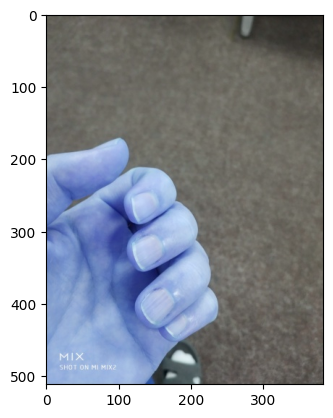

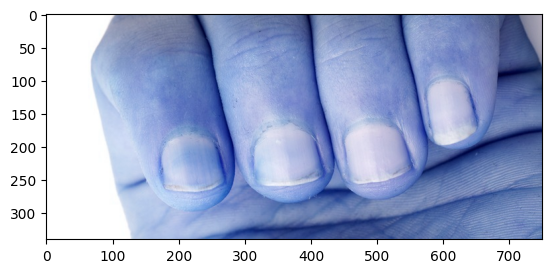

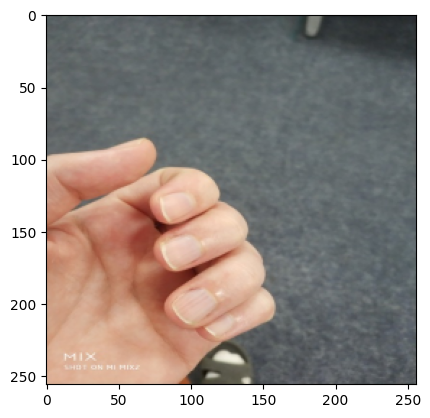

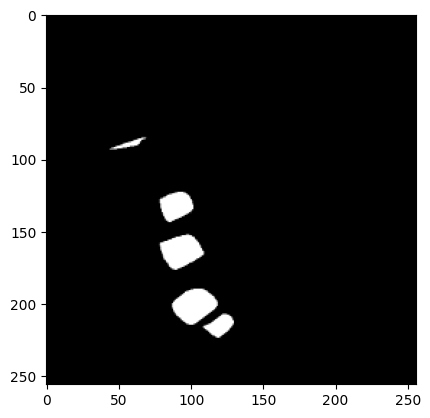

In [40]:
gn = get_imgs_and_masks(2, PATH)
img = next(gn)[0]
plt.imshow(img[0])
plt.show()
plt.imshow(img[1])
plt.show()